# Performing statistical tests

This notebook gives an example how to perform statistical tests on the computed results using the `qpcr.stats` module.

#### Experimental background

The corresponding experimental setup was as follows: 
Levels of Nonsense-mediated mRNA decay (NMD) sensitive (nmd) and insensitive (prot) transcript isoforms of HNRNPL and SRSF11 were measured by qPCR. As normalisers both 28S rRNA and Actin transcript levels were measured. The replicates are biological triplicates and technical douplicates. All measurements from the same qPCR sample were merged into hexaplicates (6 replicates). This was done in two separate HeLa cell lines (one with a specific gene knockout (KO), and one without (WT)), which were both treated to a plasmid-mediated rescue (+) or not (-), leading to four experimental conditions:


| cell line \\ condition | rescue | no rescue |
| ---------------------- | ------ | --------- |
| knockout               | KO+    | KO-       |
| wildtype               | WT+    | WT-       |



In [1]:
# import qpcr and the stats module
import qpcr
import qpcr.stats as qstats

1 - Statistical tests
---

Using `qpcr` we can directly perform statistical tests on our data. The integrated `qpcr.stats` module offers _multiple T-Tests_ to perform pairwise comparisons and _ANOVA_. Both analyses are offered either _assay-wise_ or _group-wise_. In _assay-wise_ mode comparisons we compare the different _groups within each assay separately_, whereas in _group-wise_ mode we compare the different _assays within each group separately_. 

The tests are conveniently implemented through a functional API, but originate from the dedicated `qpcr.stats.Evaluator` class - however, we most likely will never have to manually set this up ourselves. The functions (and the Evaluator) work directly with a `qpcr.Results` object and return a _Comparison_ object (originally so named because of the multiple comparisons performed by T-Tests). Conveniently, the Comparisons are also directly attached to the Results object and are automatically integrated into the preview figures. 


2 - Evaluating our data with T-Tests
---

### 2.1 Standard Workflow

We perform our standard workflow of loading data, followed by $\Delta \Delta Ct$ analysis.

In [2]:
# get our datafiles
normaliser_files = [
                    "./Example Data/28S.csv",
                    "./Example Data/actin.csv"
                ]

assay_files = [
                "./Example Data/HNRNPL_nmd.csv",
                "./Example Data/HNRNPL_prot.csv",
                "./Example Data/SRSF11_nmd.csv",
                "./Example Data/SRSF11_prot.csv",
            ]

# define our experimental parameters
reps = 6
group_names = ["WT-", "WT+", "KO-", "KO+"] 


In [3]:
# now read and analyse
all_assays = qpcr.read([assay_files, normaliser_files], replicates=reps, names=group_names)
all_assays = qpcr.delta_ct(all_assays)
results = qpcr.normalise(all_assays[0], all_assays[1])
results.stats()

,group,group_name,assay,n,mean,stdev,median,"IQR_(0.25, 0.75)",CI_0.95
0,0,WT-,HNRNPL_nmd_rel_28S+actin,6,1.050056,0.029452,1.050267,0.038511,"[1.0161980755868047, 1.0839147340669306]"
4,1,WT+,HNRNPL_nmd_rel_28S+actin,6,6.052860,0.890336,6.366251,1.516539,"[5.029330209330722, 7.076390063511062]"
8,2,KO-,HNRNPL_nmd_rel_28S+actin,6,9.566500,0.513593,9.614924,0.734027,"[8.976073861884581, 10.156926829088912]"
12,3,KO+,HNRNPL_nmd_rel_28S+actin,6,16.940332,1.126687,16.964906,1.096016,"[15.645093462670095, 18.235569627233723]"
1,0,WT-,HNRNPL_prot_rel_28S+actin,6,1.025239,0.040091,1.006244,0.028966,"[0.9791503057437683, 1.0713284193830188]"
5,1,WT+,HNRNPL_prot_rel_28S+actin,6,0.913758,0.050860,0.917271,0.042987,"[0.8552897342904139, 0.9722270525874591]"
9,2,KO-,HNRNPL_prot_rel_28S+actin,6,0.856658,0.029906,0.862768,0.028070,"[0.8222776478939225, 0.891038325780611]"
13,3,KO+,HNRNPL_prot_rel_28S+actin,6,0.925665,0.057855,0.931949,0.073664,"[0.859154910656904, 0.9921743211393722]"
2,0,WT-,SRSF11_nmd_rel_28S+actin,6,0.885403,0.102865,0.857620,0.172183,"[0.7671489539924317, 1.0036564706179987]"
6,1,WT+,SRSF11_nmd_rel_28S+actin,6,3.374373,0.638138,3.644576,0.813222,"[2.6407697994029142, 4.107976488500923]"


### 2.2 Performing T-tests on our results

Now we perform multiple T-tests to compare the different _groups_ within our _assays_ (i.e. "assaywise t-tests"). We can do so using the `qpcr.stats.assaywise_ttests` function.

In [4]:
ttests = qstats.assaywise_ttests(results)
ttests.to_df() # get the test results as a pandas dataframe

,a,b,pval,pval_adj,stat,effect_size,id
0,KO+,KO+,NaN,NaN,NaN,NaN,HNRNPL_nmd_rel_28S+actin
1,KO+,KO-,NaN,NaN,NaN,NaN,HNRNPL_nmd_rel_28S+actin
2,KO+,WT+,NaN,NaN,NaN,NaN,HNRNPL_nmd_rel_28S+actin
3,KO+,WT-,NaN,NaN,NaN,NaN,HNRNPL_nmd_rel_28S+actin
4,KO-,KO+,1.091626e-07,1.637438e-07,-13.316149,7.373831,HNRNPL_nmd_rel_28S+actin
...,...,...,...,...,...,...,...
11,WT+,WT-,NaN,NaN,NaN,NaN,SRSF11_prot_rel_28S+actin
12,WT-,KO+,7.518940e-02,9.022729e-02,-1.985438,0.126859,SRSF11_prot_rel_28S+actin
13,WT-,KO-,2.598427e-03,5.196853e-03,3.980604,0.122310,SRSF11_prot_rel_28S+actin
14,WT-,WT+,4.966919e-04,1.490076e-03,-5.053499,0.188270,SRSF11_prot_rel_28S+actin


And just like this we get a dataframe. You may notice the many _NaN_ entries. This is because by default the tests only store the values of one comparison (i.e. "A vs B", but not also "B vs A", since they would be identical anyway). However, if you prefer a a "full picture", you can use the `make_symmetric` method of the comparison object to get a "full" dataframe.

In [5]:
ttests.make_symmetric()
ttests.to_df()

,a,b,pval,pval_adj,stat,effect_size,id
0,KO+,KO+,NaN,NaN,NaN,NaN,HNRNPL_nmd_rel_28S+actin
1,KO+,KO-,1.091626e-07,1.637438e-07,-13.316149,7.373831,HNRNPL_nmd_rel_28S+actin
2,KO+,WT+,1.072654e-08,2.145308e-08,-16.953324,10.887471,HNRNPL_nmd_rel_28S+actin
3,KO+,WT-,2.423943e-11,7.271829e-11,-31.525713,15.890275,HNRNPL_nmd_rel_28S+actin
4,KO-,KO+,1.091626e-07,1.637438e-07,-13.316149,7.373831,HNRNPL_nmd_rel_28S+actin
...,...,...,...,...,...,...,...
11,WT+,WT-,4.966919e-04,1.490076e-03,-5.053499,0.188270,SRSF11_prot_rel_28S+actin
12,WT-,KO+,7.518940e-02,9.022729e-02,-1.985438,0.126859,SRSF11_prot_rel_28S+actin
13,WT-,KO-,2.598427e-03,5.196853e-03,3.980604,0.122310,SRSF11_prot_rel_28S+actin
14,WT-,WT+,4.966919e-04,1.490076e-03,-5.053499,0.188270,SRSF11_prot_rel_28S+actin


### 2.3 Selecting pairs to compare

Most often we do not actually want or need to compare all possible pairs but have a specific question in mind. We can provide pairs to compare specifically using the `pairs` argument. This argument accepts lists of group identifiers (or assay ids) or tuples thereof to selectively perform statistical tests.

In [6]:
# compare only WT- and KO- 
ttests = qstats.assaywise_ttests(results, pairs=["WT-", "KO-"])
ttests.to_df()

,a,b,pval,pval_adj,stat,effect_size,id
0,KO+,KO+,NaN,NaN,NaN,NaN,HNRNPL_nmd_rel_28S+actin
1,KO+,KO-,NaN,NaN,NaN,NaN,HNRNPL_nmd_rel_28S+actin
2,KO+,WT+,NaN,NaN,NaN,NaN,HNRNPL_nmd_rel_28S+actin
3,KO+,WT-,NaN,NaN,NaN,NaN,HNRNPL_nmd_rel_28S+actin
4,KO-,KO+,NaN,NaN,NaN,NaN,HNRNPL_nmd_rel_28S+actin
...,...,...,...,...,...,...,...
11,WT+,WT-,NaN,NaN,NaN,NaN,SRSF11_prot_rel_28S+actin
12,WT-,KO+,NaN,NaN,NaN,NaN,SRSF11_prot_rel_28S+actin
13,WT-,KO-,0.002598,0.002598,3.980604,0.12231,SRSF11_prot_rel_28S+actin
14,WT-,WT+,NaN,NaN,NaN,NaN,SRSF11_prot_rel_28S+actin


Or if we wish to compare only _wildtype_ and _knockout_ + vs - we would do:

In [7]:
ttests = qstats.assaywise_ttests(results, pairs=[("WT-", "WT+"), ("KO-", "KO+")])
ttests.to_df()

,a,b,pval,pval_adj,stat,effect_size,id
0,KO+,KO+,NaN,NaN,NaN,NaN,HNRNPL_nmd_rel_28S+actin
1,KO+,KO-,NaN,NaN,NaN,NaN,HNRNPL_nmd_rel_28S+actin
2,KO+,WT+,NaN,NaN,NaN,NaN,HNRNPL_nmd_rel_28S+actin
3,KO+,WT-,NaN,NaN,NaN,NaN,HNRNPL_nmd_rel_28S+actin
4,KO-,KO+,1.091626e-07,1.903709e-07,-13.316149,7.373831,HNRNPL_nmd_rel_28S+actin
...,...,...,...,...,...,...,...
11,WT+,WT-,NaN,NaN,NaN,NaN,SRSF11_prot_rel_28S+actin
12,WT-,KO+,NaN,NaN,NaN,NaN,SRSF11_prot_rel_28S+actin
13,WT-,KO-,NaN,NaN,NaN,NaN,SRSF11_prot_rel_28S+actin
14,WT-,WT+,4.966919e-04,9.933838e-04,-5.053499,0.188270,SRSF11_prot_rel_28S+actin


### 2.4 Visualising statistical comparisons

Conveniently, the results preview plotters automatically integrate the statistical tests into their figures. We can simply plot the results as usual and we will see the significance bars in the right places.

> #### Note:
> This visualisation is *only* available in _static_ figures!

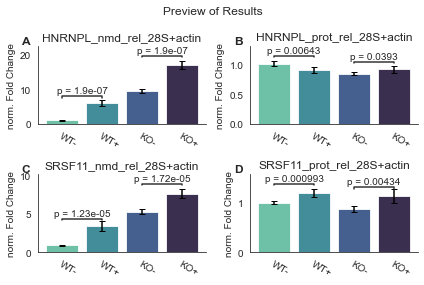

In [9]:
fig = results.preview()

### 3.5 Styling the visualisation

The preview accepts some _kwargs_ to further control the styling of significance bars. For once, using `annotate_pvals` we can switch the labelling on and off. Then, using `pval_kws` we can provide a dictionary with styling parameters.

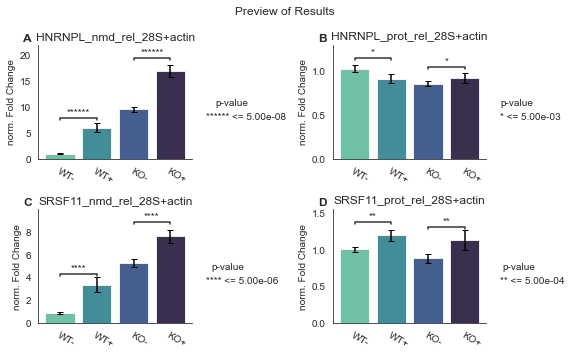

In [12]:
fig = results.preview(figsize=(8,5), pval_kws=dict(style="*"))

3 - Evaluating our data with ANOVA
----

Instead of comparing individual pairs within our data, we can also check if there is overall variance across all groups per assay. To do this, we can use `assaywise_anova` instead of `assaywise_ttests`. The resulting table summarizes the p-value in each analysed assay.

In [13]:
anova = qstats.assaywise_anova(results)
anova.to_df()

,id,pval,stat
0,HNRNPL_nmd_rel_28S+actin,7.798242e-18,383.446724
0,HNRNPL_prot_rel_28S+actin,1.239437e-04,11.642482
0,SRSF11_nmd_rel_28S+actin,9.027072e-15,185.855714
0,SRSF11_prot_rel_28S+actin,7.159838e-05,12.701184


Of course, if in your data the groups are are more meaningful than assays, then `qpcr` also offers the same functions in group-wise mode through `groupwise_ttests` and `groupwise_anova`.

Alright, with this we have reached the end of this tutorial on the statistical tests that can be directly performed using `qpcr` - congrats!